<a href="https://colab.research.google.com/github/KhansaKhanam/Predictive-Analytics/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [26]:
data = pd.read_csv("SystemAdministrators.csv")
data.head()

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


### **Create a scatter plot of Experience vs. Training using color or symbol to distinguish programmers who completed the task from those who did not complete it. Which predictor(s) appear(s) potentially useful for classifying task completion?**

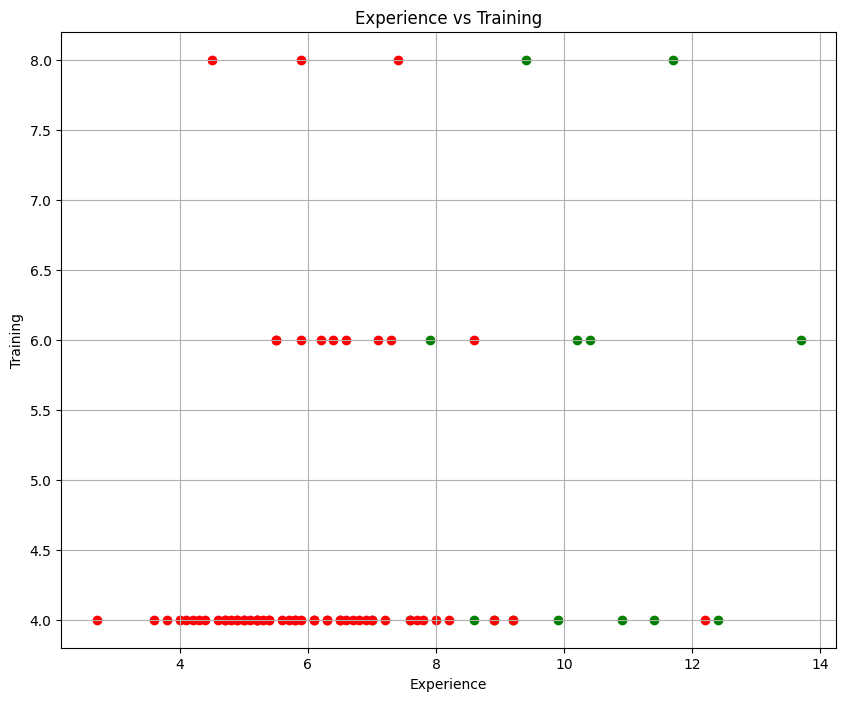

In [27]:
x = data["Experience"]
y = data["Training"]

plt.figure(figsize = (10,8))
for exp, tra, status in zip(data["Experience"], data["Training"], data["Completed task"]):
    plt.scatter(exp, tra, c = "green" if status == "Yes" else "red")

plt.xlabel("Experience")
plt.ylabel("Training")
plt.title("Experience vs Training")
plt.grid(True)
plt.show()

From the above graph, I believe Experience has more to contribute towards job completion over Training credits.

### **Run a logistic regression model with both predictors using the entire dataset as training data. Among those who completed the task, what is the percentage of programmers incorrectly classified as failing to complete the task?**

In [28]:
# Declaring dependent and independent variables
x = data[["Experience","Training"]]
y = data["Completed task"]

In [29]:
# Standardising independent variables
scalar = StandardScaler()
x = scalar.fit_transform(x)

In [30]:
# Type conversion of "Completed task"
y = y.astype("category").cat.codes

In [31]:
# Logistic Regression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [32]:
y_pred = model.predict(x)

In [50]:
confusionMatrix = confusion_matrix(y,y_pred)
tn, fp, fn, tp = confusionMatrix.ravel()

# what is the percentage of programmers incorrectly classified as failing to complete the task
print("Percentage of programmers incorrectly classified as failing to complete the task = {:.2f}%".format(fn/(fn+fp)*100))

print("Confusion Matrix = {}".format(confusionMatrix))

Percentage of programmers incorrectly classified as failing to complete the task = 85.71%
Confusion Matrix = [[59  1]
 [ 6  9]]


### **To decrease the percentage in part (2), should the cutoff probability be increased or decreased?**

In [46]:
y_pred = model.predict(x)

cutoff = 0.3
y_pred_adjusted = (y_pred >= cutoff).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the misclassification rate for those who completed the task
misclassified_complete_adjusted = fn / (fn + tp) * 100

# Display results
print("\nConfusion Matrix with Cutoff Probability = 0.3:\n", conf_matrix)
print(f"Percentage of programmers who completed the task but were misclassified as not completing it: {misclassified_complete_adjusted:.2f}%")


Confusion Matrix with Cutoff Probability = 0.3:
 [[59  1]
 [ 6  9]]
Percentage of programmers who completed the task but were misclassified as not completing it: 40.00%


### **How much experience must be accumulated by a programmer with 4 years of training before his or her estimated probability of completing the task exceeds 0.5?**

In [48]:
intercept = model.intercept_[0]
coef_experience, coef_training = model.coef_[0]

# Set the training years to 4
training_years = 4

# Calculate the minimum experience needed for a probability > 0.5
# Solve for Experience in the inequality: intercept + coef_experience * Experience + coef_training * training_years > 0
required_experience = (0 - intercept - (coef_training * training_years)) / coef_experience

print(f"Minimum years of experience required: {required_experience:.2f}")

Minimum years of experience required: 0.70


Reference:
1. https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
2. https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24